In [1]:
#==================== We set product parameters to download ====================
destination_path = './GOESimages/'
product_list = { # ABI Products
"ABI-L2-ACHAF": "Cloud Top Height",
"ABI-L2-ACHTF": "Cloud Top Temperature",
"ABI-L2-ACMF": "Clear Sky  Mask",
"ABI-L2-ACTPF": "Cloud Top Phase",
## "ABI-L2-DMWVF": "Derived Motion Winds - Vapor",
## "ABI-L2-DSRF": "Downward Shortwave Radiation",
"ABI-L2-LSTF": "Land Surface Temperature",
"ABI-L2-RRQPEF": "Rainfall rate",
"ABI-L2-TPWF": "Total Precipitable Water",
}
products = list(product_list)
#==================== Setting up time reference variables ====================
from datetime import datetime, timedelta, timezone
import os, pytz, time
utc = pytz.timezone('UTC') # UTC timezone
utcm5 = pytz.timezone('America/Lima') # UTC-5 timezone
from IPython.display import display, Image, clear_output
import numpy as np
import GOESutils.GOESplots as gplt
import GOESutils.GOESimport as gimp
import GOESutils.DataBaseUtils as dbu
import goes2go as g2g
import importlib, sys
# importlib.reload(sys.modules['GOESutils.GOESplots'])
# import GOESutils.GOESplots as gplt
# importlib.reload(sys.modules['GOESutils.GOESimport'])
# import GOESutils.GOESimport as gimp

c:\Users\germa\anaconda3\envs\satimg\Lib\site-packages\toolbox\cartopy_tools_OLD.py:37: UserWarning: Migrate to new `cartopy_tools` for latest updates and features.
  warnings.warn("Migrate to new `cartopy_tools` for latest updates and features.")
c:\Users\germa\anaconda3\envs\satimg\Lib\site-packages\toolbox\cartopy_tools_OLD.py:241: AccessorRegistrationWarning: registration of accessor <class 'toolbox.cartopy_tools_OLD.xr_to_cartopy'> under name 'xmap' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("xmap")


# Products in a time range

In [9]:
importlib.reload(sys.modules['GOESutils.GOESimport'])
import GOESutils.GOESimport as gimp

In [2]:
# importlib.reload(sys.modules['GOESutils.GOESimport'])
# import GOESutils.GOESimport as gimp
startdate = datetime(2020,1,1,tzinfo=utcm5)
enddate = datetime(2020,2,1,tzinfo=utcm5)
prodFileList = gimp.GOESfiles("timerange", startdate, enddate, freq=timedelta(minutes=30),
                              target_product="RadF", bands=14,
                              to_display=True, download=False)

Searching for products: ABI-L1b-RadF (Press 'esc' to stop)
Looking for product ABI-L1b-RadF, set of files from date 01-Feb-2020 05:00 
Total Size: 41.25 GB


file  \
0     noaa-goes16/ABI-L1b-RadF/2020/001/05/OR_ABI-L1...   
1     noaa-goes16/ABI-L1b-RadF/2020/001/05/OR_ABI-L1...   
2     noaa-goes16/ABI-L1b-RadF/2020/001/06/OR_ABI-L1...   
3     noaa-goes16/ABI-L1b-RadF/2020/001/06/OR_ABI-L1...   
4     noaa-goes16/ABI-L1b-RadF/2020/001/07/OR_ABI-L1...   
...                                                 ...   
1479  noaa-goes16/ABI-L1b-RadF/2020/032/02/OR_ABI-L1...   
1480  noaa-goes16/ABI-L1b-RadF/2020/032/03/OR_ABI-L1...   
1481  noaa-goes16/ABI-L1b-RadF/2020/032/03/OR_ABI-L1...   
1482  noaa-goes16/ABI-L1b-RadF/2020/032/04/OR_ABI-L1...   
1483  noaa-goes16/ABI-L1b-RadF/2020/032/04/OR_ABI-L1...   

                         start                       end  \
0    2020-01-01 00:00:21-05:00 2020-01-01 00:09:52-05:00   
1    2020-01-01 00:40:21-05:00 2020-01-01 00:49:52-05:00   
2    2020-01-01 01:10:21-05:00 2020-01-01 01:19:52-05:00   
3    2020-01-01 01:30:21-05:00 2020-01-01 01:39:52-05:00   
4    2020-01-01 02:00:21-05:00 2020-01-01 02:09:52-05:00   
...                        ...                       ...   
1479 2020-01-31 21:40:14-05:00 2020-01-31 21:49:45-05:00   
1480 2020-01-31 22:10:14-05:00 2020-01-31 22:19:45-05:00   
1481 2020-01-31 22:40:14-05:00 2020-01-31 22:49:45-05:00   
1482 2020-01-31 23:10:14-05:00 2020-01-31 23:19:45-05:00   
1483 2020-01-31 23:40:14-05:00 2020-01-31 23:49:45-05:00   

                      creation       product band      size  
0    2020-01-01 00:10:00-05:00  ABI-L1b-RadF   14  28.68 MB  
1    2020-01-01 00:40:00-05:00  ABI-L1b-RadF   14  28.71 MB  
2    2020-01-01 01:10:00-05:00  ABI-L1b-RadF   14  28.72 MB  
3    2020-01-01 01:40:00-05:00  ABI-L1b-RadF   14  28.73 MB  
4    2020-01-01 02:10:00-05:00  ABI-L1b-RadF   14  28.74 MB  
...                        ...           ...  ...       ...  
1479 2020-01-31 21:40:00-05:00  ABI-L1b-RadF   14  28.14 MB  
1480 2020-01-31 22:10:00-05:00  ABI-L1b-RadF   14  28.16 MB  
1481 2020-01-31 22:40:00-05:00  ABI-L1b-RadF   14  28.19 MB  
1482 2020-01-31 23:10:00-05:00  ABI-L1b-RadF   14  28.23 MB  
1483 2020-01-31 23:40:00-05:00  ABI-L1b-RadF   14  28.26 MB  

[1484 rows x 7 columns]

In [11]:
initial_time = datetime.now(utcm5)
product = prodFileList['product'][0]
for f in list(prodFileList['file']): # Reading each file downloaded
    print("Working with file: {}".format(os.path.basename(f)))                
    FullFileName = os.path.join(destination_path,f)
    data, ProductParams = gimp.ImportingData(FullFileName, product)
    data = gimp.CleaningData(data, product)
    dataset = gplt.export_as(data, ProductParams["DataAttrs"], 
                        filename=ProductParams["DataAttrs"]['dataset_name'],
                        path="./GOESimages/Data")
    

    # Check if it's time to clear the output
    CurrentTime = datetime.now(utcm5)
    minute, seconds = CurrentTime.minute, CurrentTime.second
    elapsed_time = CurrentTime - initial_time
    if elapsed_time >= timedelta(minutes=1):
        # Clear the output
        clear_output(wait=True)
        # Reset the start time
        initial_time = datetime.now(utcm5)
        
print("All the files have been processed.")

Working with file: OR_ABI-L1b-RadF-M6C14_G16_s20200320040144_e20200320049452_c20200320049532.nc
Export successful: ./GOESimages/Data/OR_ABI-L1b-RadF-M6C14_G16_s20200320040144_e20200320049452_c20200320049532.nc
Working with file: OR_ABI-L1b-RadF-M6C14_G16_s20200320110144_e20200320119452_c20200320119531.nc
Export successful: ./GOESimages/Data/OR_ABI-L1b-RadF-M6C14_G16_s20200320110144_e20200320119452_c20200320119531.nc
Working with file: OR_ABI-L1b-RadF-M6C14_G16_s20200320140144_e20200320149452_c20200320149547.nc
Export successful: ./GOESimages/Data/OR_ABI-L1b-RadF-M6C14_G16_s20200320140144_e20200320149452_c20200320149547.nc
Working with file: OR_ABI-L1b-RadF-M6C14_G16_s20200320210144_e20200320219452_c20200320219532.nc
Export successful: ./GOESimages/Data/OR_ABI-L1b-RadF-M6C14_G16_s20200320210144_e20200320219452_c20200320219532.nc
Working with file: OR_ABI-L1b-RadF-M6C14_G16_s20200320240144_e20200320249452_c20200320249538.nc
Export successful: ./GOESimages/Data/OR_ABI-L1b-RadF-M6C14_G16_s

In [ ]:
initial_time = datetime.now(utcm5)
for product in products:
    for f in list(prodFileList['file']): # Reading each file downloaded
        print("Working with file: {}".format(os.path.basename(f)))                
        FullFileName = os.path.join(destination_path,f)
        data, ProductParams = gimp.ImportingData(FullFileName, product)
        data = gimp.CleaningData(data, product)
        FullImageName = os.path.join(ProductParams["ImagePath"],"Peru",ProductParams["ImageName"])
        if os.path.exists(FullImageName): # If png image exists, it is shown
            print("Image '{}' already exists in '{}'".format(ProductParams["ImageName"],ProductParams["ImagePath"]))
            display(Image(filename=FullImageName, width=640))
        else: # Creating png image
            file_datetime = ProductParams["ImageTime"].astimezone(utc)
            gFileList = goes_nearesttime(file_datetime.replace(tzinfo=None), product="ABI-L2-MCMIPF", return_as="filelist", download=True, save_dir=destination_path)
            try:
                RGBdata, GeoColorParams = gimp.GeoColorData(os.path.join(destination_path,gFileList.iloc[0]["file"]))
            except:
                gFileList = goes_nearesttime(file_datetime.replace(tzinfo=None), product="ABI-L2-MCMIPF", return_as="filelist", download=True, save_dir=destination_path, overwrite=True)
                RGBdata, GeoColorParams = gimp.GeoColorData(os.path.join(destination_path,gFileList.iloc[0]["file"]))
            figGeo, axGeo = gplt.GeoColorPlot(RGBdata, GeoColorParams, toSave=False, toDisplay=False, toUpload=False, dpi=300)
            if (not os.path.exists(ProductParams["ImagePath"])):
                print(f"Directory for product {product} does not exist. Creating new one...") 
                os.makedirs(ProductParams["ImagePath"])
            print(f"Image for file {os.path.basename(f)} not found, creating one...")
            figProd = gplt.ProductPlot(data, product, axGeo, ProductParams, toSave=True, toDisplay=True, toUpload=False, dpi=600)

        # Check if it's time to clear the output
        CurrentTime = datetime.now(utcm5)
        minute, seconds = CurrentTime.minute, CurrentTime.second
        elapsed_time = CurrentTime - initial_time
        if elapsed_time >= timedelta(minutes=1):
            # Clear the output
            clear_output(wait=True)
            # Reset the start time
            initial_time = datetime.now(utcm5)
            
    print("All the files have been processed.")

In [99]:
importlib.reload(sys.modules['GOESutils.GOESplots'])
import GOESutils.GOESplots as gplt
ImagesPath = ".\GOESimages\Products\ACHA\Peru"
ImagesInfo = gplt.GettingImagesInfo(ImagesPath, start_date=startdate, end_date=enddate)
gplt.GOESvideos(ImagesInfo, VideoPath=".\GOESimages\Products\ACHA", extension=".avi")

Video ACHA_from_28-Oct-23_to_29-Oct-23.avi created successfully in path: '.\GOESimages\Products\ACHA'


# Products in real time

Current time is: 2023-11-21 22:59:57 -05
Searching for products: ABI-L2-MCMIPF (Press 'esc' to stop)
Looking for product ABI-L2-MCMIPF, set of files from date 22-Nov-2023 03:00 
Total Size: 232.76 MB
File [OR_ABI-L2-MCMIPF-M6_G16_s20233260340207_e20233260349522_c20233260350000.nc] already exists on [./GOESimages/noaa-goes16/ABI-L2-MCMIPF/2023/326/03]. Do not overwriteFinished downloading 1 files to [./GOESimages/]                                                                                                                                                                                                                                                                                                       
Reading file OR_ABI-L2-MCMIPF-M6_G16_s20233260340207_e20233260349522_c20233260350000.nc as geocolor image.
Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...
Searching for products: ABI-L2-ACHAF, ABI-L2-ACHTF, ABI-L2-ACMF, ABI-L2-AC

file  \
0  noaa-goes16/ABI-L2-ACHAF/2023/326/03/OR_ABI-L2...   
1  noaa-goes16/ABI-L2-ACHTF/2023/326/03/OR_ABI-L2...   
2  noaa-goes16/ABI-L2-ACMF/2023/326/03/OR_ABI-L2-...   
3  noaa-goes16/ABI-L2-ACTPF/2023/326/03/OR_ABI-L2...   
4  noaa-goes16/ABI-L2-LSTF/2023/326/03/OR_ABI-L2-...   
5  noaa-goes16/ABI-L2-RRQPEF/2023/326/03/OR_ABI-L...   
6  noaa-goes16/ABI-L2-TPWF/2023/326/03/OR_ABI-L2-...   

                      start                       end  \
0 2023-11-21 22:40:20-05:00 2023-11-21 22:49:51-05:00   
1 2023-11-21 22:40:20-05:00 2023-11-21 22:49:51-05:00   
2 2023-11-21 22:40:20-05:00 2023-11-21 22:49:51-05:00   
3 2023-11-21 22:40:20-05:00 2023-11-21 22:49:51-05:00   
4 2023-11-21 22:00:20-05:00 2023-11-21 22:09:51-05:00   
5 2023-11-21 22:40:20-05:00 2023-11-21 22:49:51-05:00   
6 2023-11-21 22:40:20-05:00 2023-11-21 22:49:51-05:00   

                   creation        product  band      size  
0 2023-11-21 22:52:55-05:00   ABI-L2-ACHAF  None   1.54 MB  
1 2023-11-21 22:52:56-05:00   ABI-L2-ACHTF  None  28.63 MB  
2 2023-11-21 22:50:39-05:00    ABI-L2-ACMF  None  21.74 MB  
3 2023-11-21 22:51:16-05:00   ABI-L2-ACTPF  None   3.35 MB  
4 2023-11-21 22:10:42-05:00    ABI-L2-LSTF  None   0.58 MB  
5 2023-11-21 22:50:00-05:00  ABI-L2-RRQPEF  None   1.67 MB  
6 2023-11-21 22:51:25-05:00    ABI-L2-TPWF  None   0.95 MB

File [OR_ABI-L2-TPWF-M6_G16_s20233260340207_e20233260349515_c20233260351259.nc] already exists on [./GOESimages/noaa-goes16/ABI-L2-TPWF/2023/326/03]. Do not overwriteriteFinished downloading 7 files to [./GOESimages/]                                                                                                                                                                                                                                                                                               
Working with file: OR_ABI-L2-ACHAF-M6_G16_s20233260340207_e20233260349515_c20233260352558.nc
Image for file OR_ABI-L2-ACHAF-M6_G16_s20233260340207_e20233260349515_c20233260352558.nc not found, creating one...


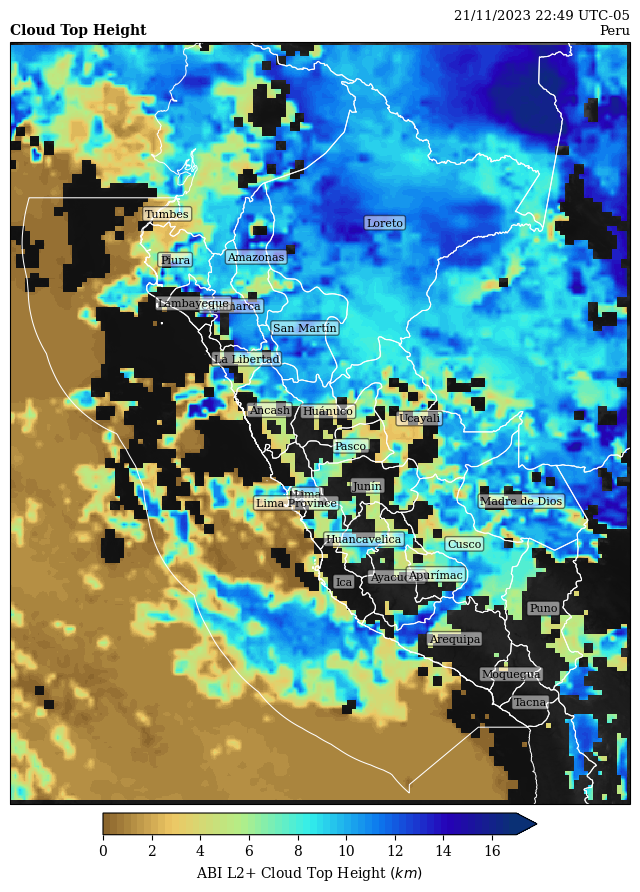

==================== Producto ABI-L2-ACHAF, Región del Perú ====================
No output
Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


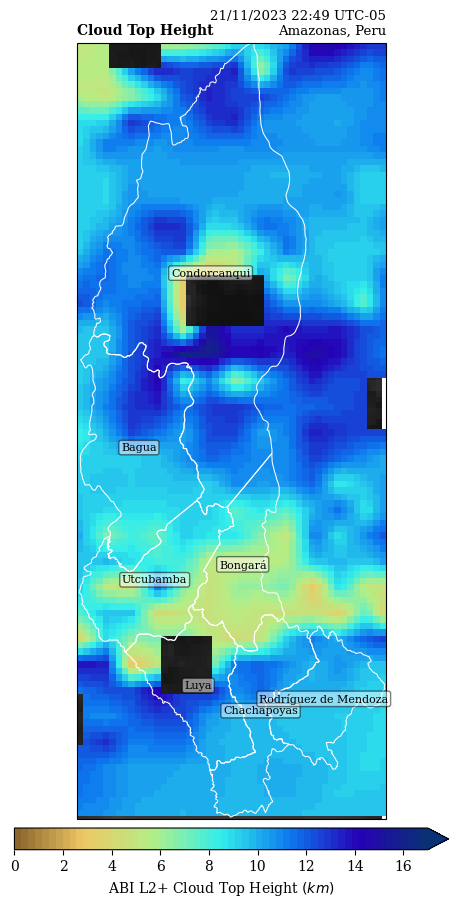

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


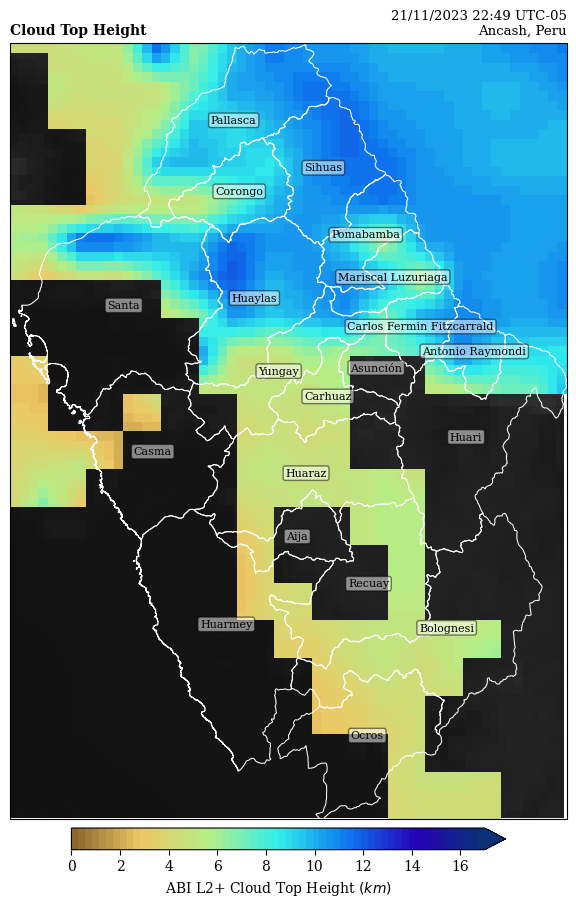

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


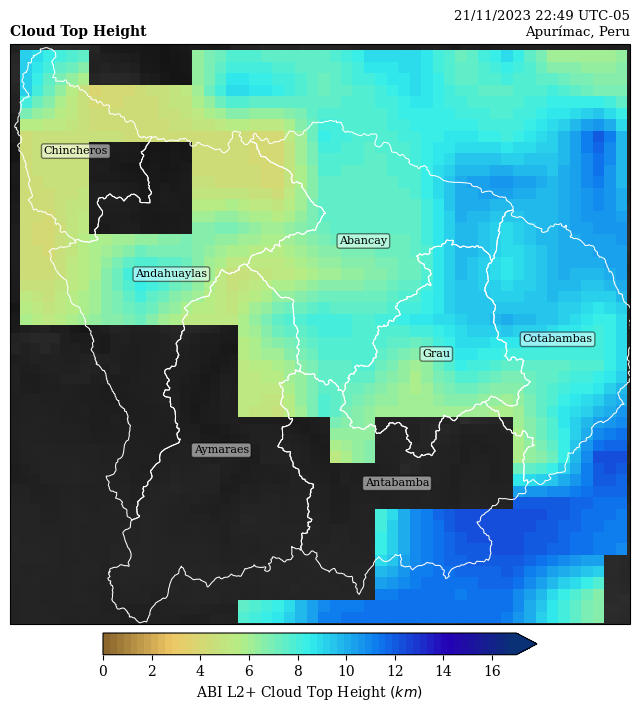

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


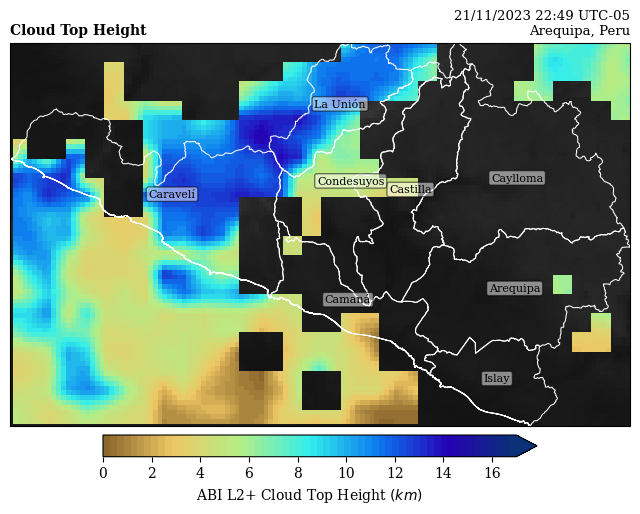

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


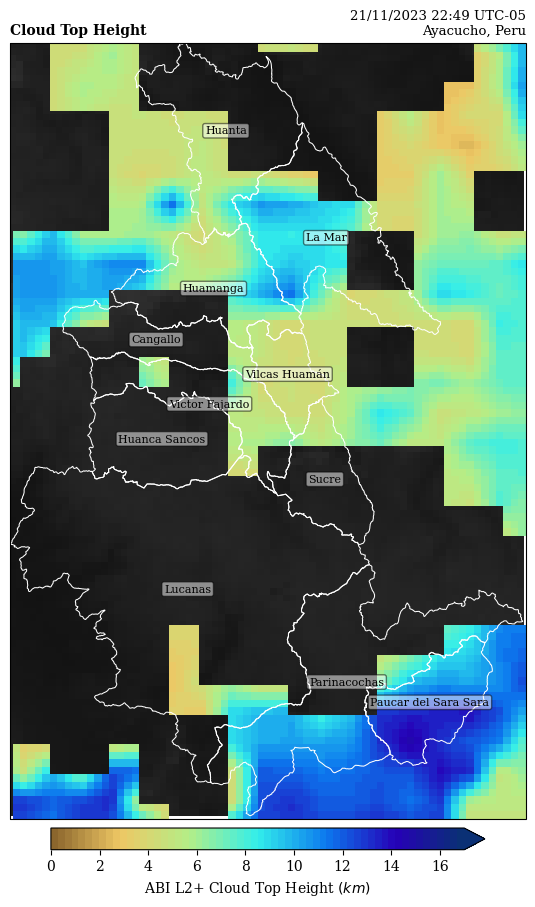

==================== Producto ABI-L2-ACHAF, Región del Perú ====================
No output
---------- Departamento: Amazonas ----------
No output
---------- Departamento: Ancash ----------
No output
---------- Departamento: Apurímac ----------
No output
---------- Departamento: Arequipa ----------
No output
---------- Departamento: Ayacucho ----------
No output
All the files have been processed.
Working with file: OR_ABI-L2-ACHTF-M6_G16_s20233260340207_e20233260349515_c20233260352560.nc
Image for file OR_ABI-L2-ACHTF-M6_G16_s20233260340207_e20233260349515_c20233260352560.nc not found, creating one...


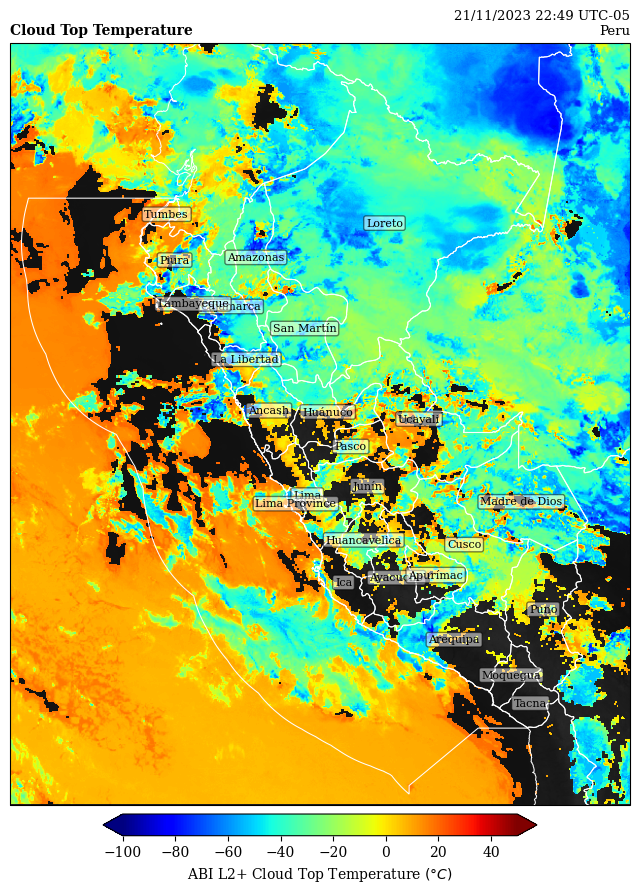

==================== Producto ABI-L2-ACHTF, Región del Perú ====================
No output
Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


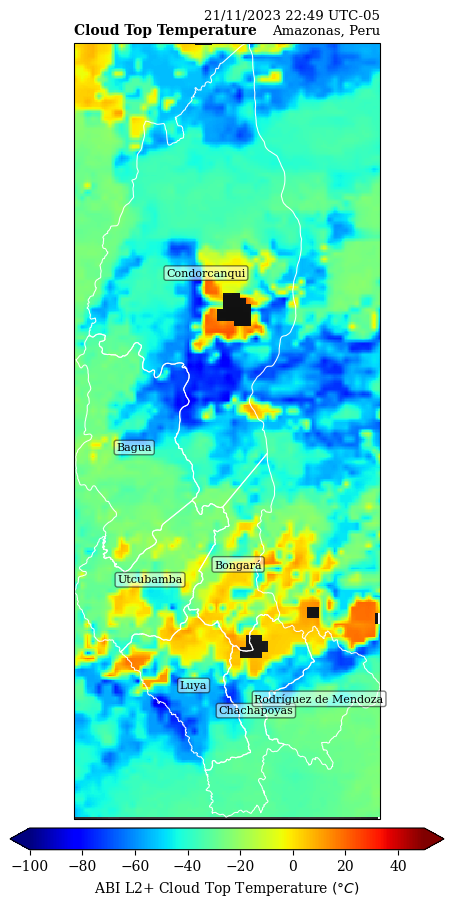

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


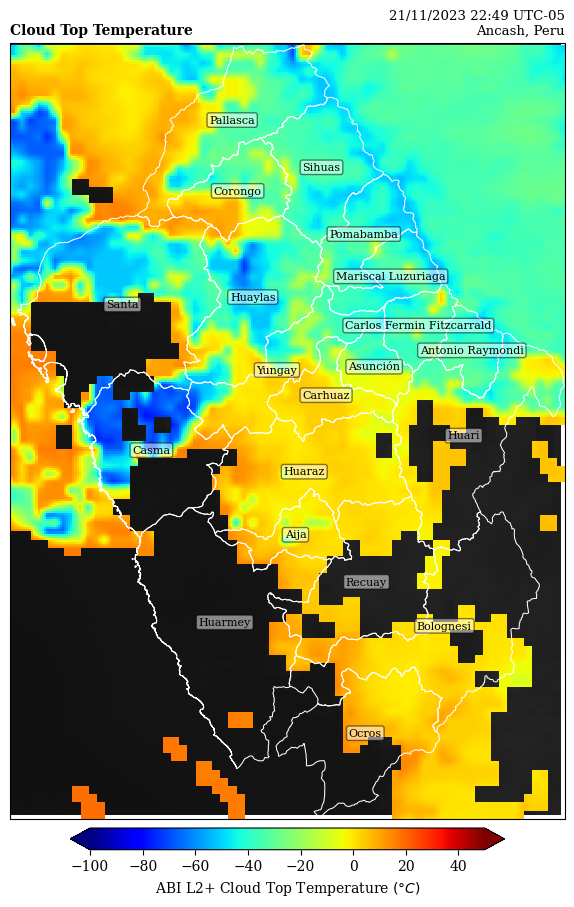

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


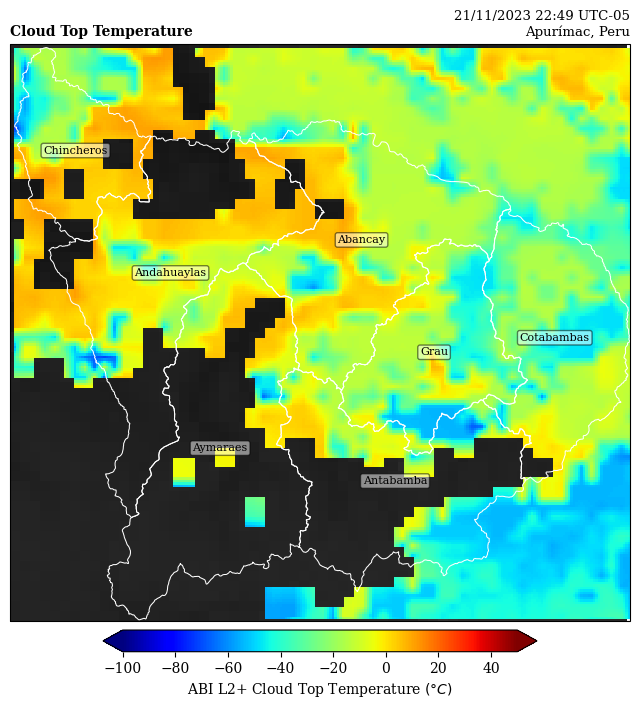

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


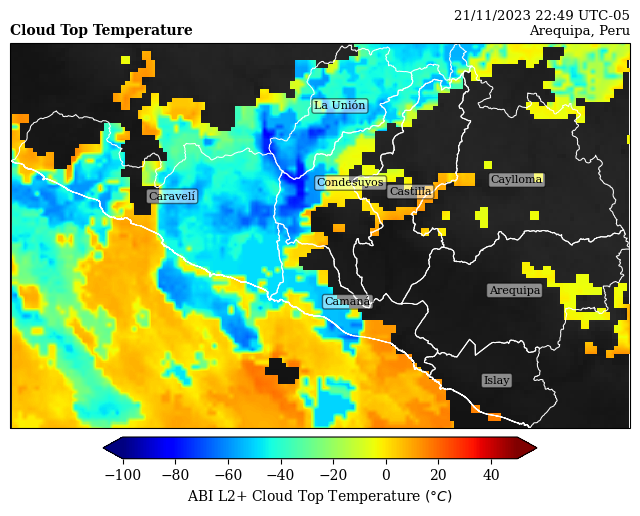

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


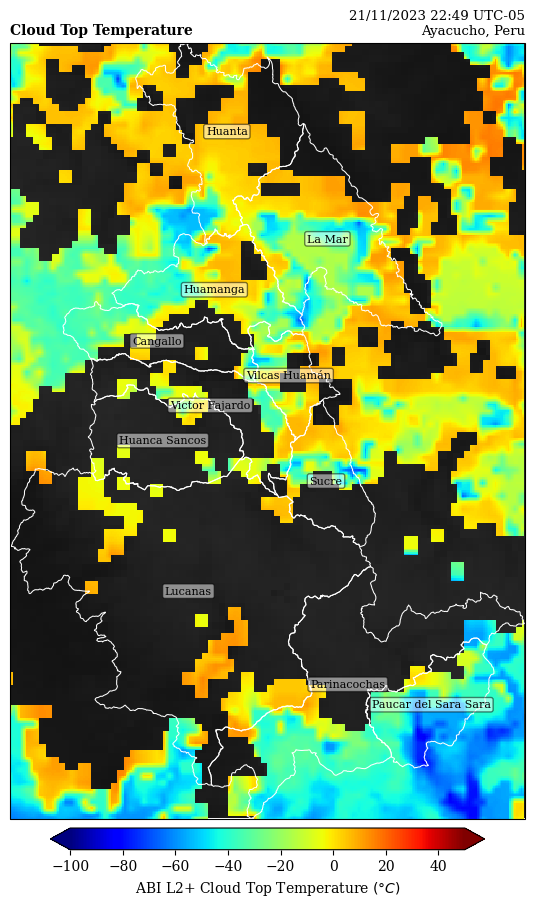

==================== Producto ABI-L2-ACHTF, Región del Perú ====================
No output
---------- Departamento: Amazonas ----------
No output
---------- Departamento: Ancash ----------
No output
---------- Departamento: Apurímac ----------
No output
---------- Departamento: Arequipa ----------
No output
---------- Departamento: Ayacucho ----------
No output
All the files have been processed.
Working with file: OR_ABI-L2-ACMF-M6_G16_s20233260340207_e20233260349515_c20233260350398.nc
Image for file OR_ABI-L2-ACMF-M6_G16_s20233260340207_e20233260349515_c20233260350398.nc not found, creating one...


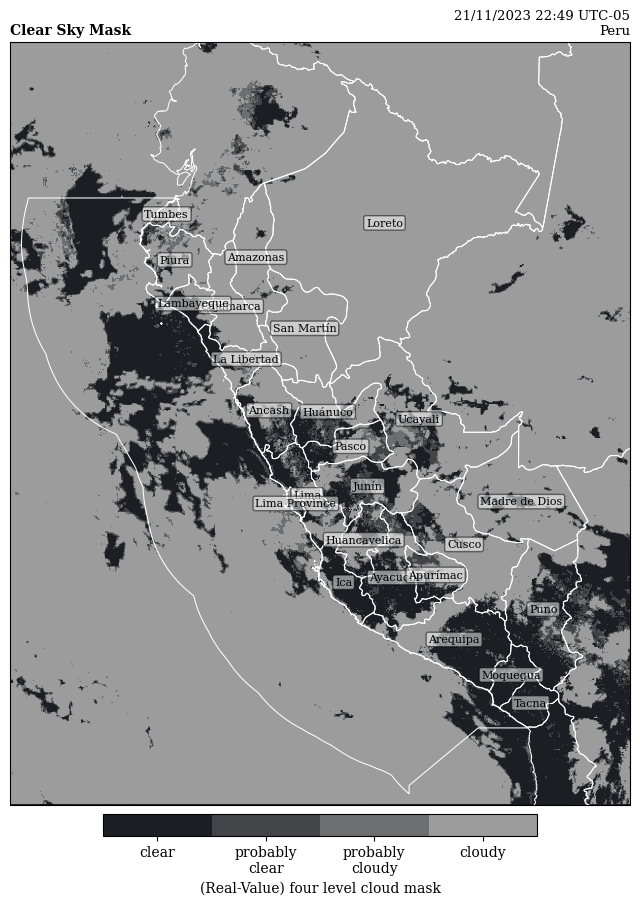

==================== Producto ABI-L2-ACMF, Región del Perú ====================
73.9% nublado, 26.1% despejado
Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


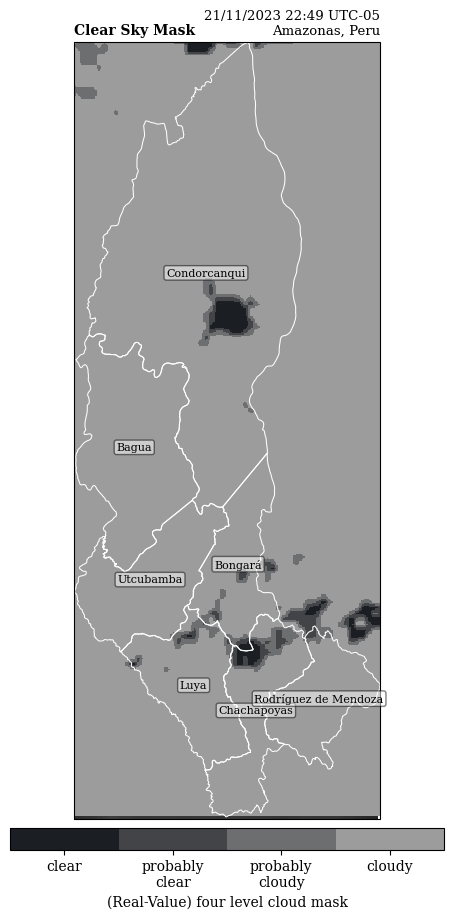

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


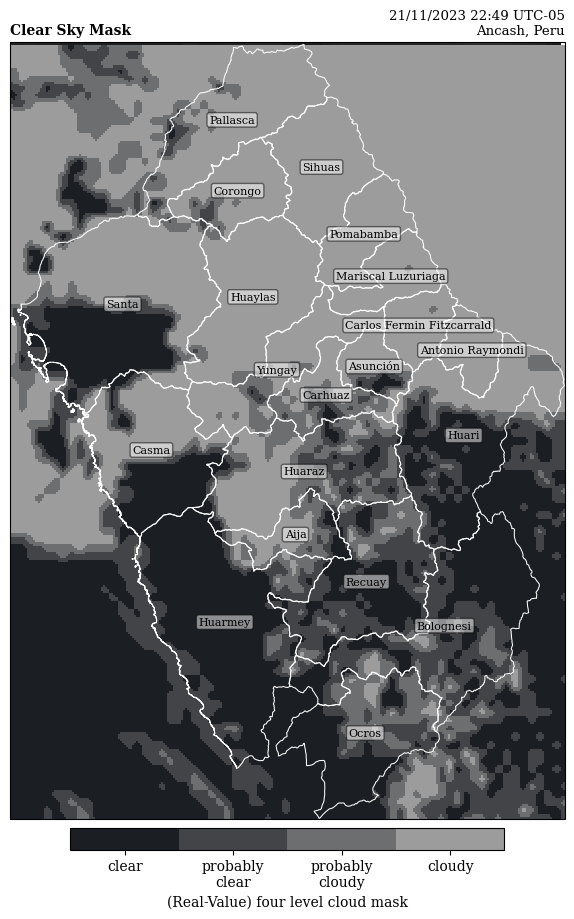

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


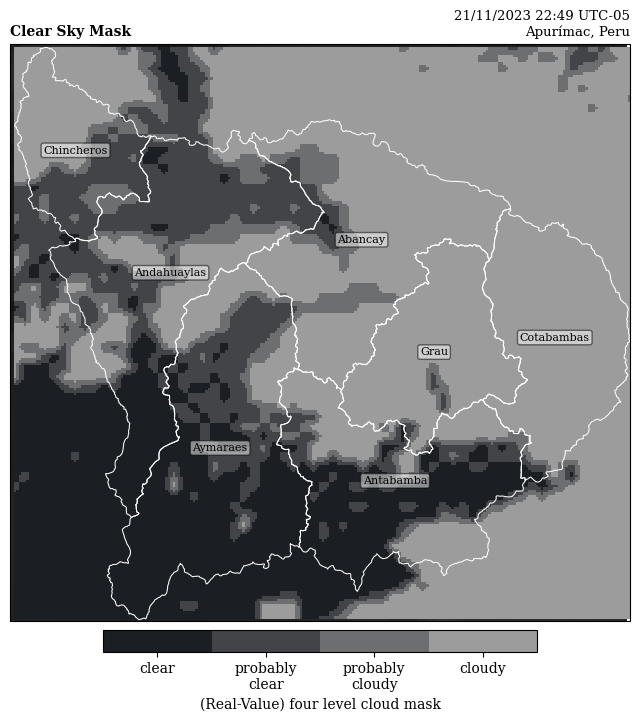

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


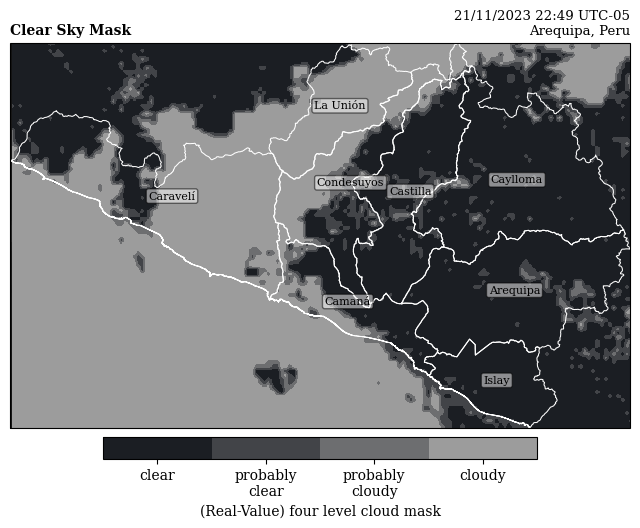

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


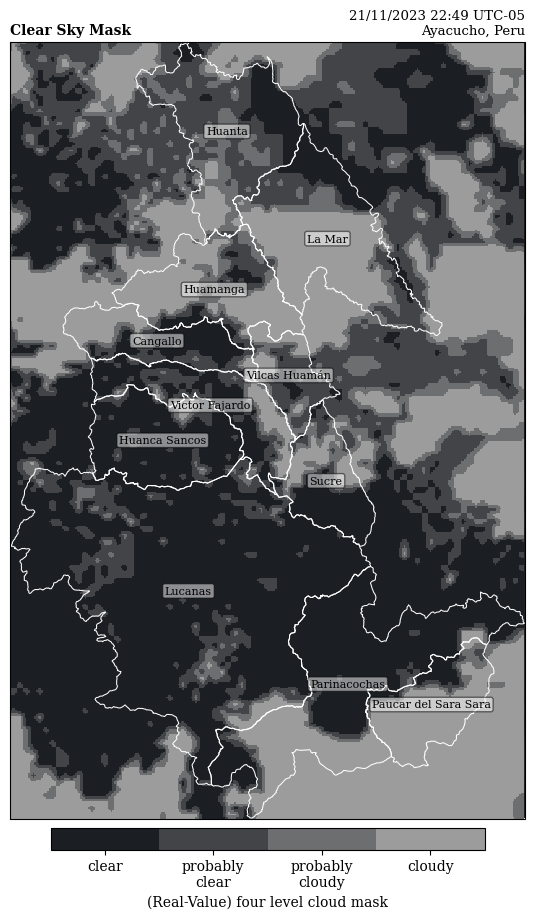

==================== Producto ABI-L2-ACMF, Región del Perú ====================
73.9% nublado, 26.1% despejado
---------- Departamento: Amazonas ----------
97.4% nublado, 2.6% despejado
---------- Departamento: Ancash ----------
58.3% nublado, 41.7% despejado
---------- Departamento: Apurímac ----------
59.3% nublado, 40.7% despejado
---------- Departamento: Arequipa ----------
33.4% nublado, 66.6% despejado
---------- Departamento: Ayacucho ----------
30.8% nublado, 69.2% despejado
All the files have been processed.
Working with file: OR_ABI-L2-ACTPF-M6_G16_s20233260340207_e20233260349515_c20233260351166.nc
Image for file OR_ABI-L2-ACTPF-M6_G16_s20233260340207_e20233260349515_c20233260351166.nc not found, creating one...


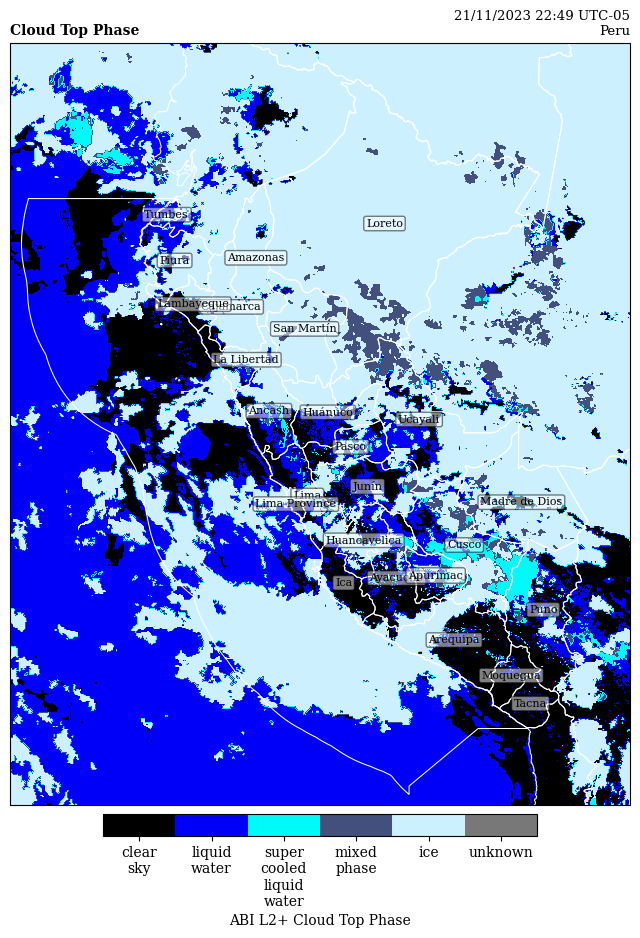

==================== Producto ABI-L2-ACTPF, Región del Perú ====================
No output
Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


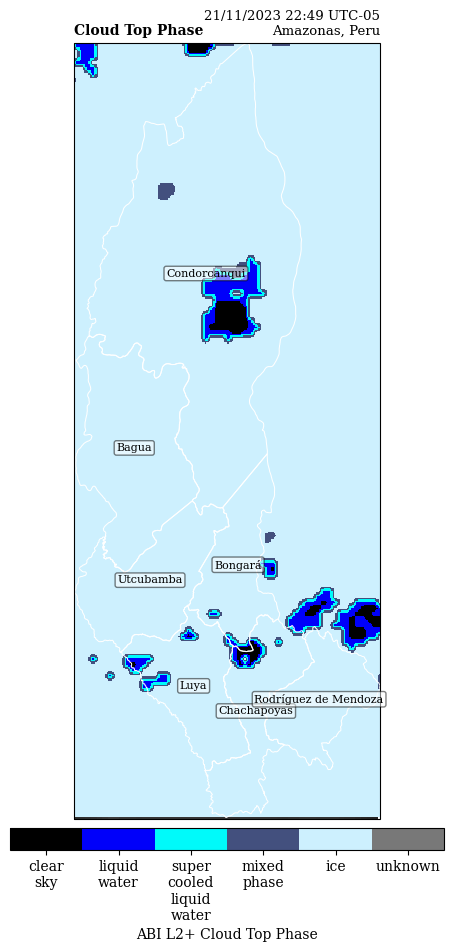

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


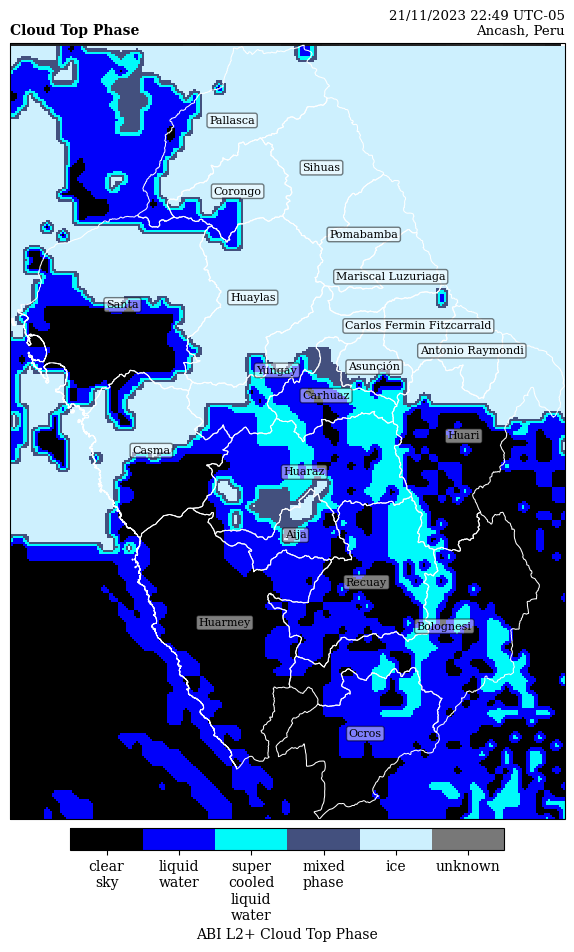

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


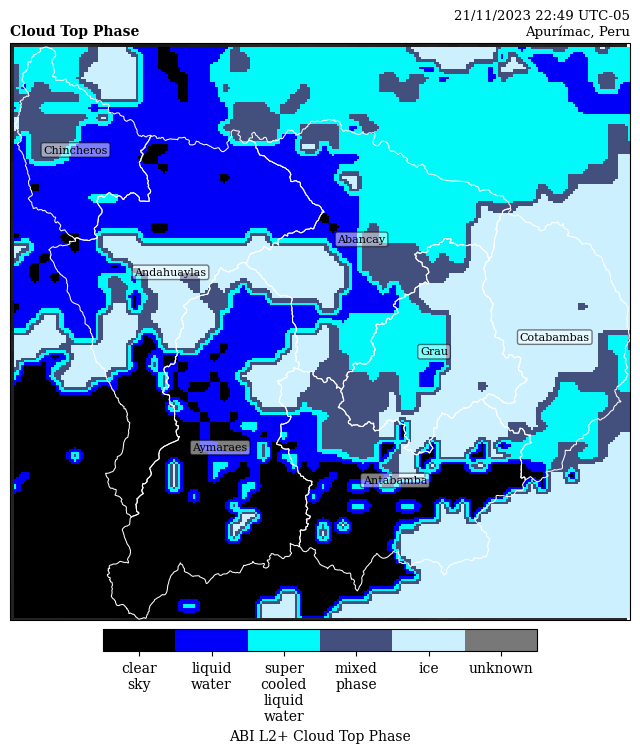

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


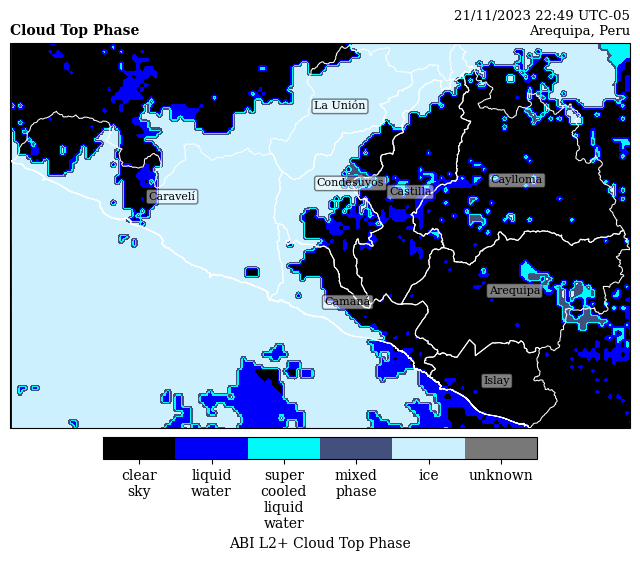

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


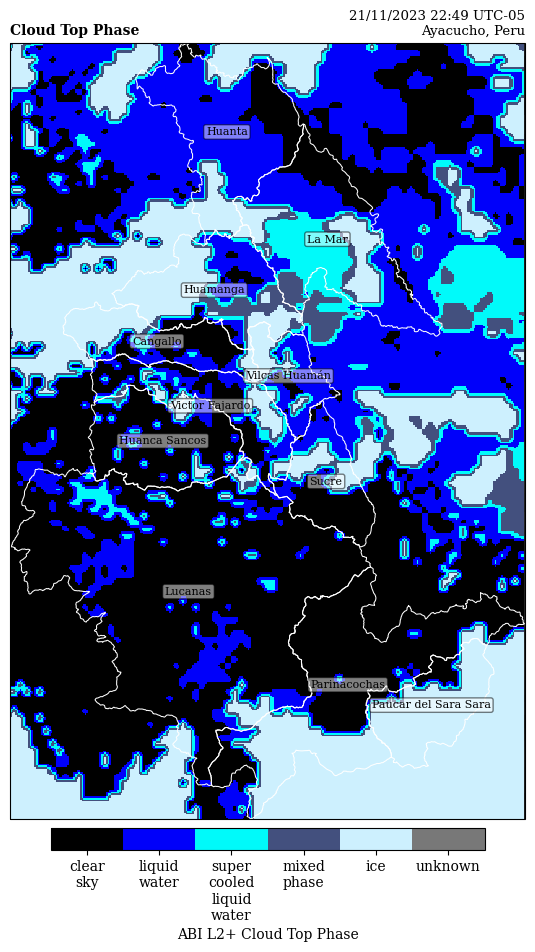

==================== Producto ABI-L2-ACTPF, Región del Perú ====================
No output
---------- Departamento: Amazonas ----------
No output
---------- Departamento: Ancash ----------
No output
---------- Departamento: Apurímac ----------
No output
---------- Departamento: Arequipa ----------
No output
---------- Departamento: Ayacucho ----------
No output
All the files have been processed.
Working with file: OR_ABI-L2-LSTF-M6_G16_s20233260300207_e20233260309515_c20233260310429.nc
Image for file OR_ABI-L2-LSTF-M6_G16_s20233260300207_e20233260309515_c20233260310429.nc not found, creating one...


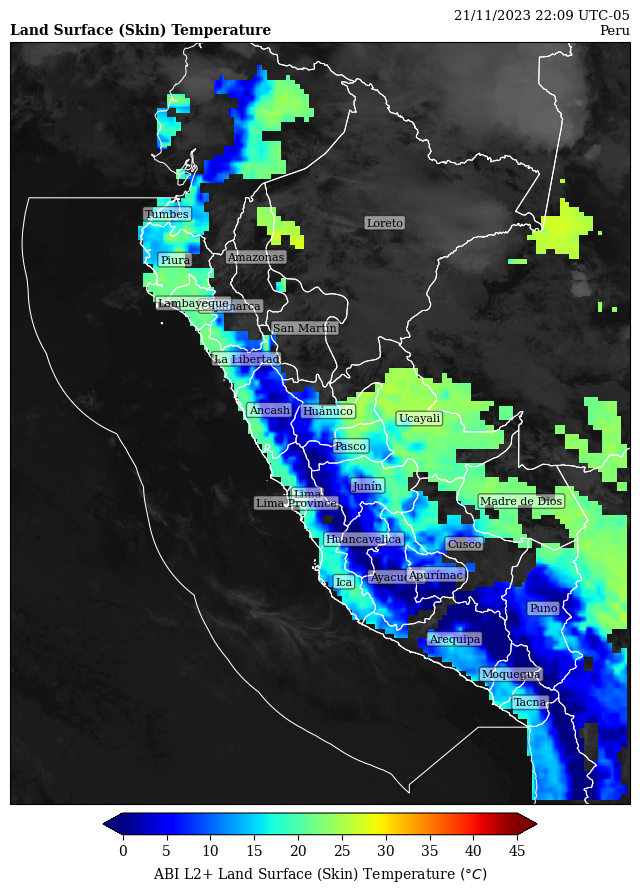

==================== Producto ABI-L2-LSTF, Región del Perú ====================
Temperatura superficial mínima, promedio, y máxima (°C): -6.1, 12.5, 28.3
Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


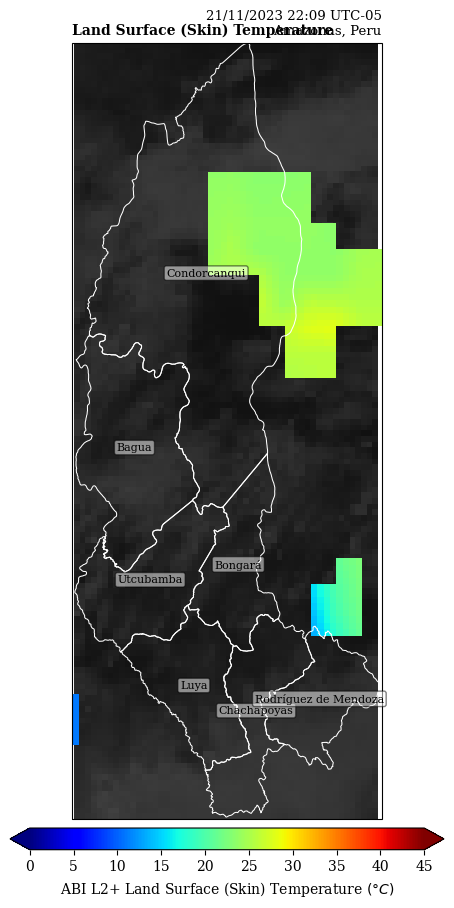

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


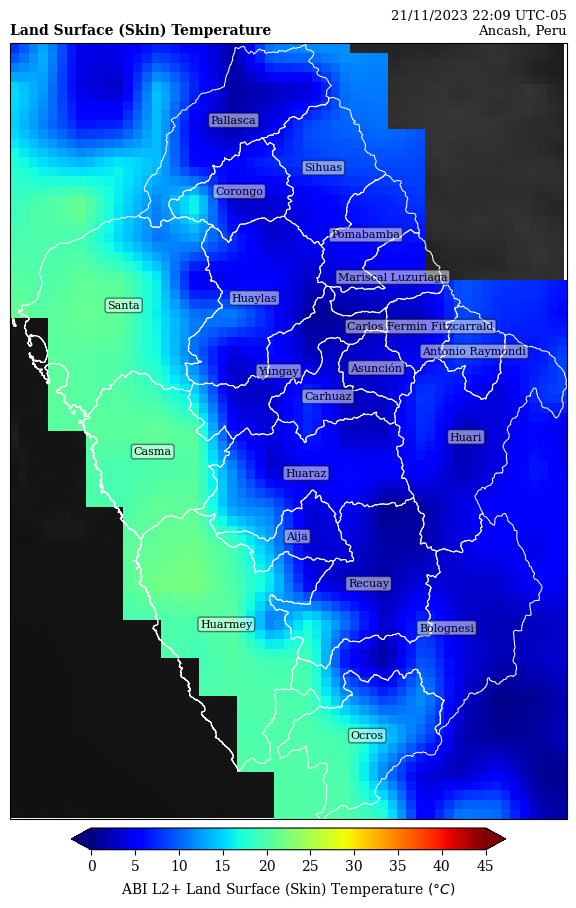

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


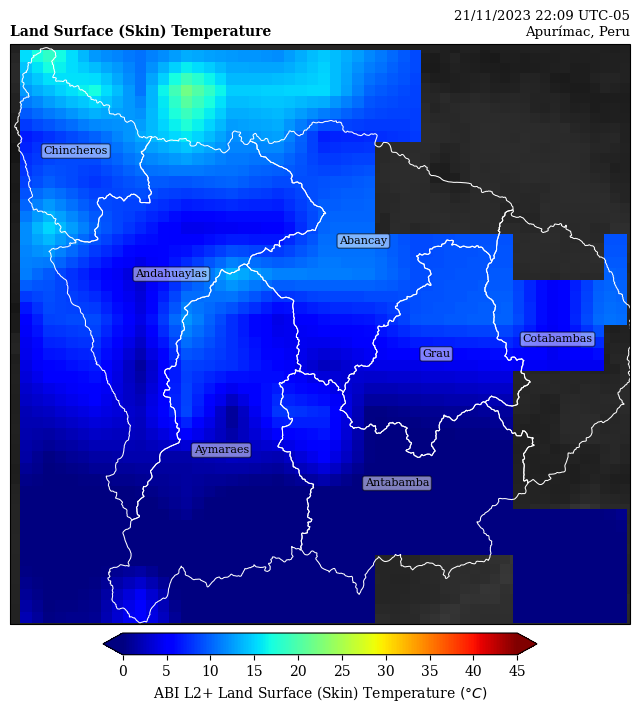

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


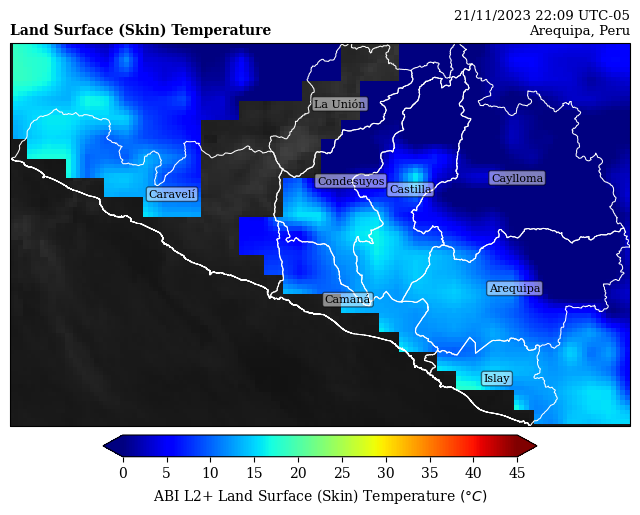

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


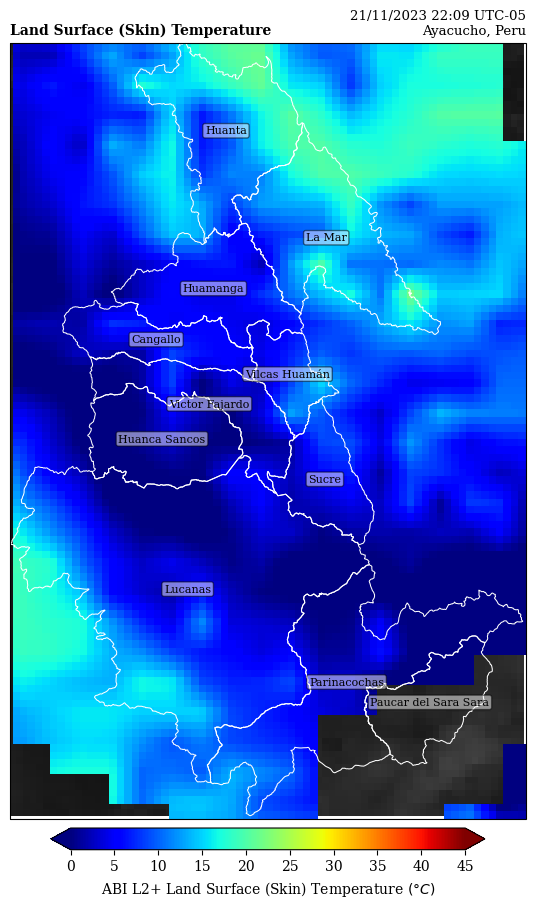

==================== Producto ABI-L2-LSTF, Región del Perú ====================
Temperatura superficial mínima, promedio, y máxima (°C): -6.1, 12.5, 28.3
---------- Departamento: Amazonas ----------
Temperatura superficial mínima, promedio, y máxima (°C): 12.0, 23.9, 26.8
---------- Departamento: Ancash ----------
Temperatura superficial mínima, promedio, y máxima (°C): 0.4, 10.2, 22.4
---------- Departamento: Apurímac ----------
Temperatura superficial mínima, promedio, y máxima (°C): -5.1, 4.7, 14.0
---------- Departamento: Arequipa ----------
Temperatura superficial mínima, promedio, y máxima (°C): -5.6, 6.5, 19.1
---------- Departamento: Ayacucho ----------
Temperatura superficial mínima, promedio, y máxima (°C): -6.1, 6.2, 22.0
All the files have been processed.
Working with file: OR_ABI-L2-RRQPEF-M6_G16_s20233260340207_e20233260349515_c20233260350004.nc
Image for file OR_ABI-L2-RRQPEF-M6_G16_s20233260340207_e20233260349515_c20233260350004.nc not found, creating one...


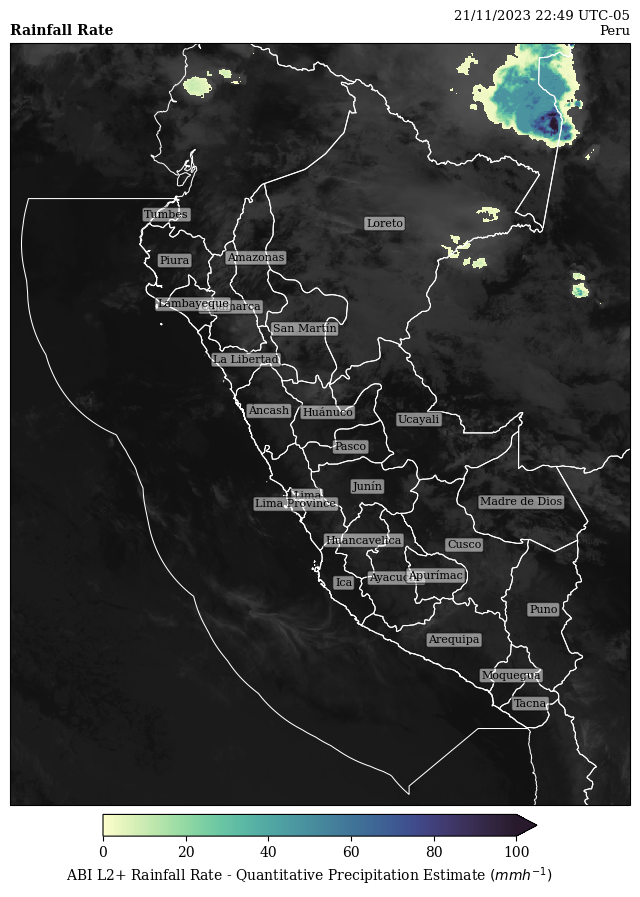

==================== Producto ABI-L2-RRQPEF, Región del Perú ====================
['0.14% Lluvia moderada', '0.01% Lluvia ligera', '99.85% Sin lluvia']
Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


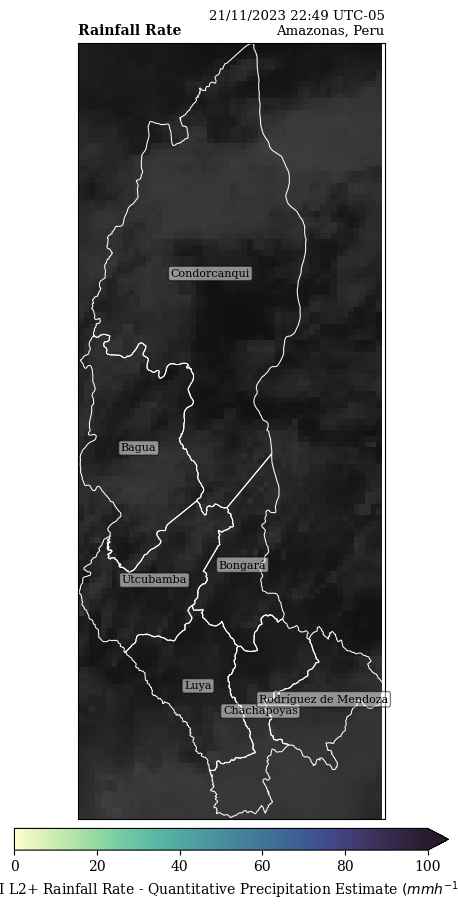

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


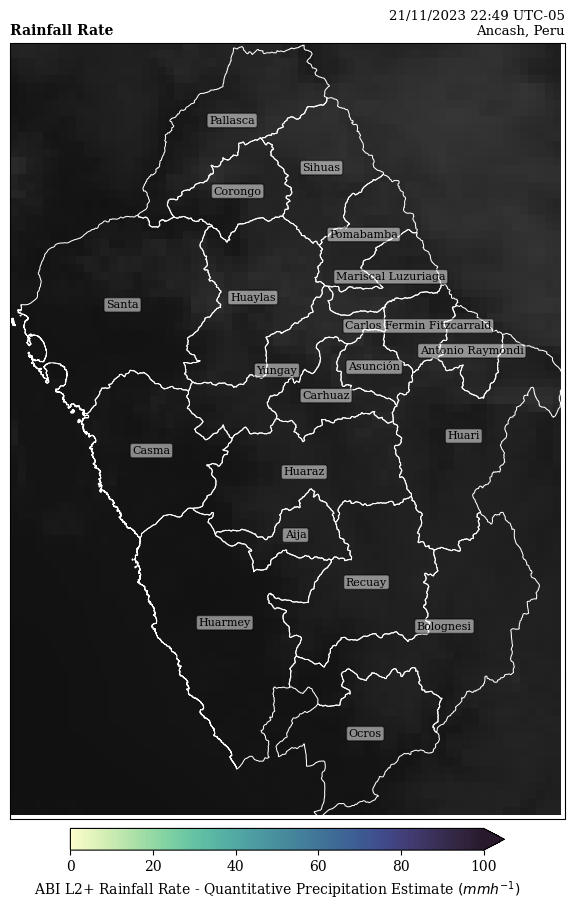

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


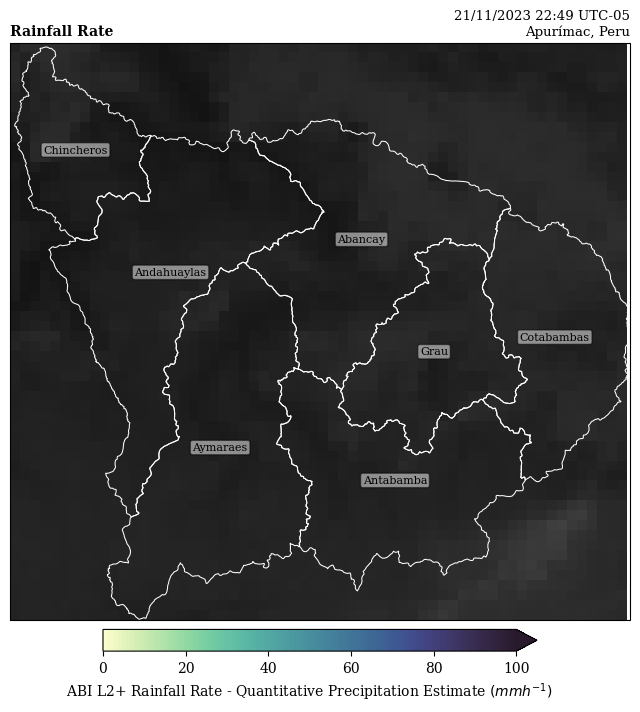

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


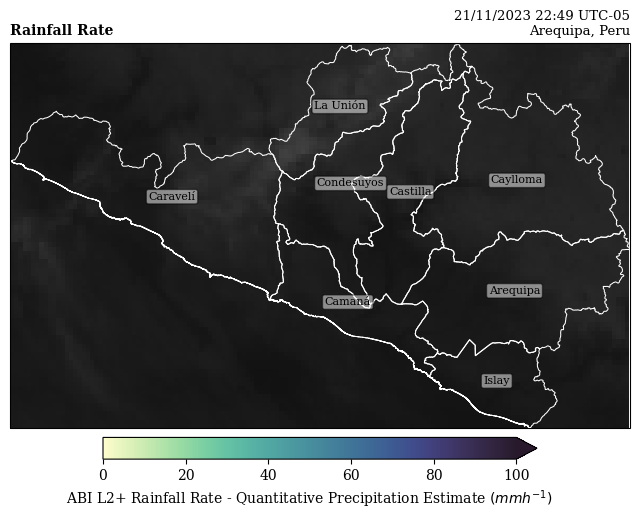

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


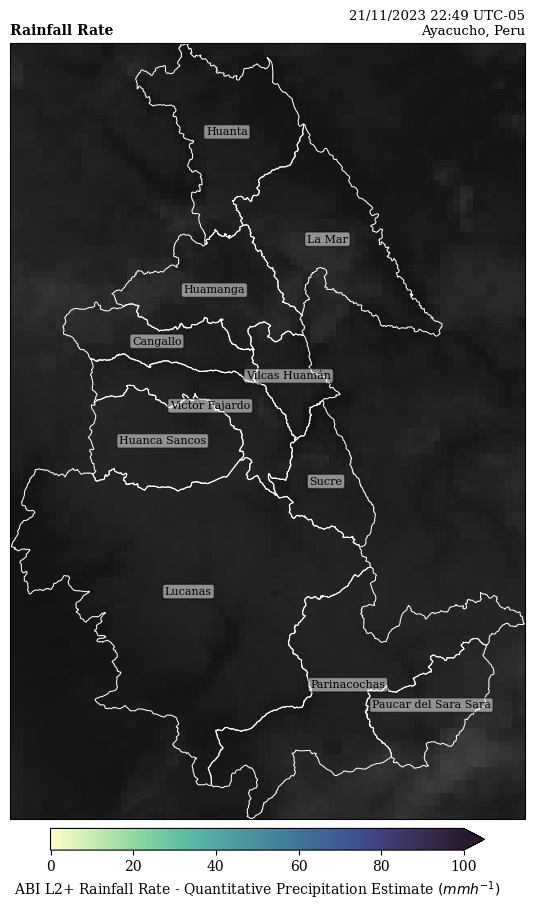

==================== Producto ABI-L2-RRQPEF, Región del Perú ====================
['0.14% Lluvia moderada', '0.01% Lluvia ligera', '99.85% Sin lluvia']
---------- Departamento: Amazonas ----------
['100.00% Sin lluvia']
---------- Departamento: Ancash ----------
['100.00% Sin lluvia']
---------- Departamento: Apurímac ----------
['100.00% Sin lluvia']
---------- Departamento: Arequipa ----------
['100.00% Sin lluvia']
---------- Departamento: Ayacucho ----------
['100.00% Sin lluvia']
All the files have been processed.
Working with file: OR_ABI-L2-TPWF-M6_G16_s20233260340207_e20233260349515_c20233260351259.nc
Image for file OR_ABI-L2-TPWF-M6_G16_s20233260340207_e20233260349515_c20233260351259.nc not found, creating one...


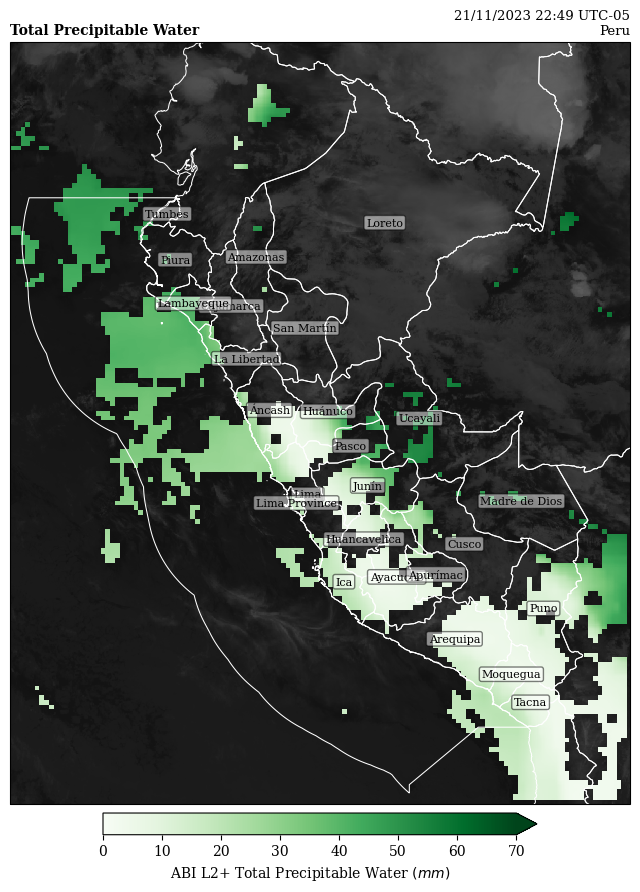

==================== Producto ABI-L2-TPWF, Región del Perú ====================
Promedio de agua precipitable 19.79
Agua precipitable acumulada 37.29m
Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


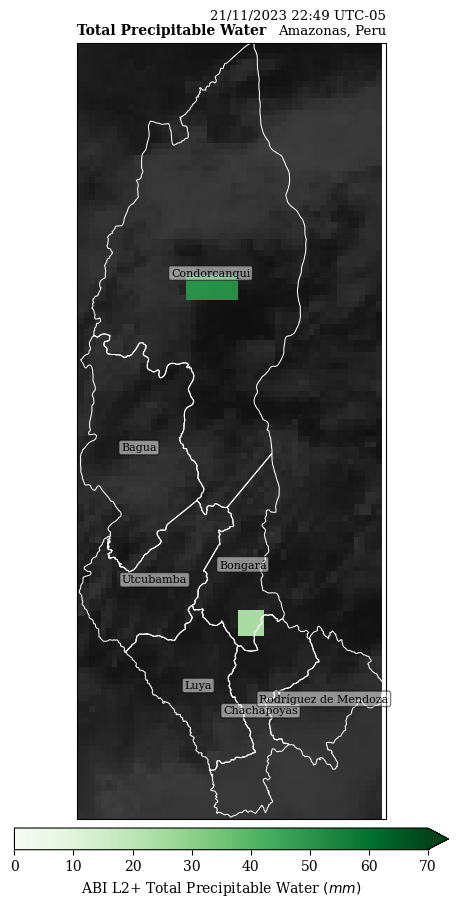

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


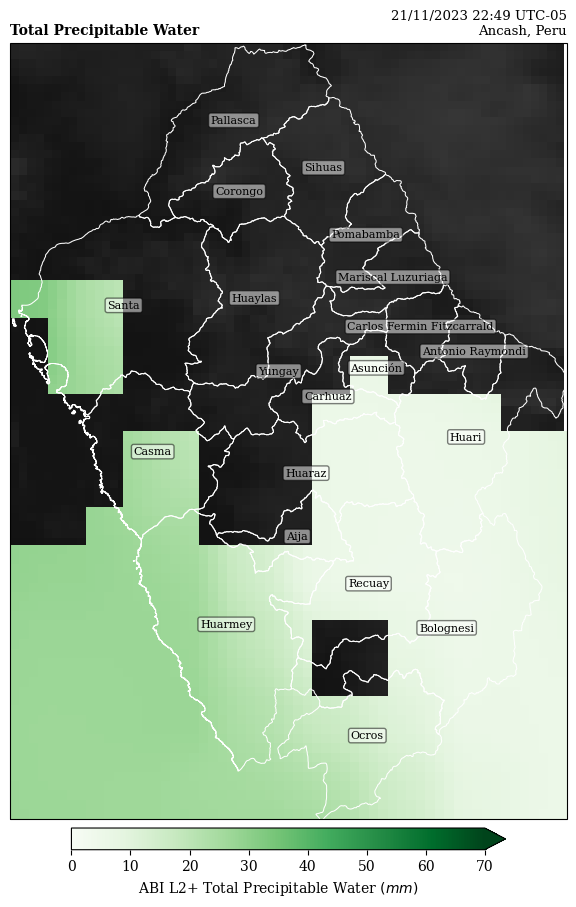

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


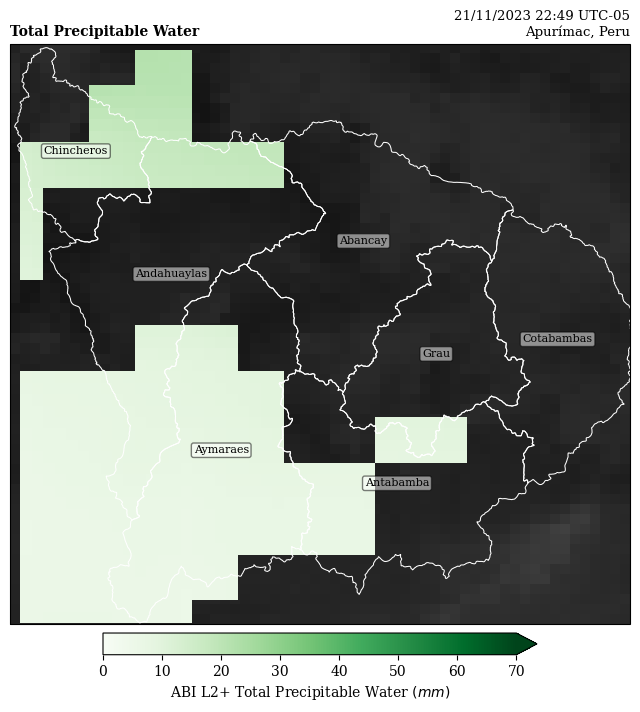

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


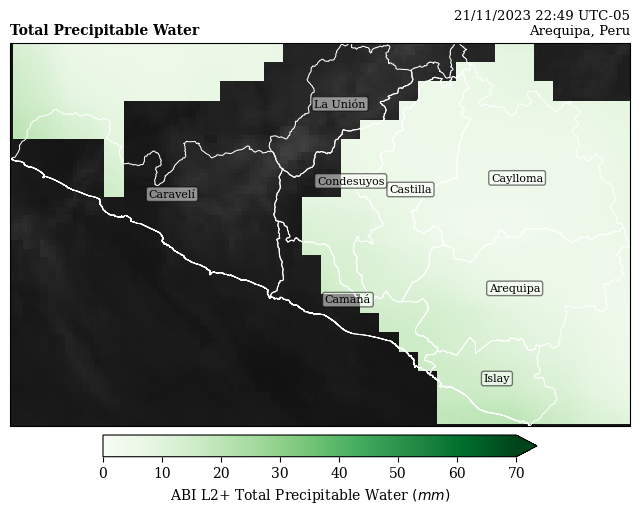

Plotting geocolor image at 2023-11-21 22:49:52.200000-05:00.
It is nighttime! Plotting TrueColor image...


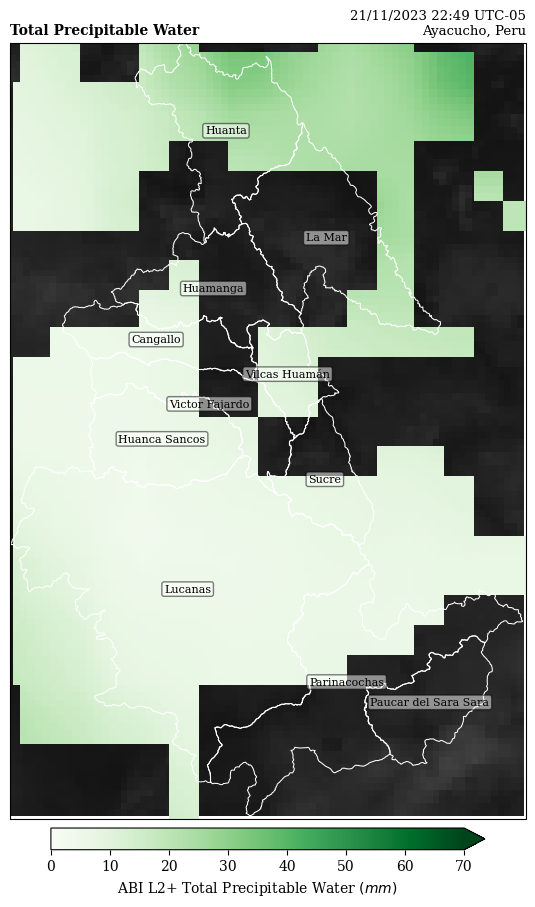

==================== Producto ABI-L2-TPWF, Región del Perú ====================
Promedio de agua precipitable 19.79
Agua precipitable acumulada 37.29m
---------- Departamento: Amazonas ----------
Promedio de agua precipitable 40.55
Agua precipitable acumulada 0.41m
---------- Departamento: Ancash ----------
Promedio de agua precipitable 13.49
Agua precipitable acumulada 1.32m
---------- Departamento: Apurímac ----------
Promedio de agua precipitable 10.18
Agua precipitable acumulada 0.48m
---------- Departamento: Arequipa ----------
Promedio de agua precipitable 8.43
Agua precipitable acumulada 1.87m
---------- Departamento: Ayacucho ----------
Promedio de agua precipitable 9.29
Agua precipitable acumulada 1.43m
All the files have been processed.


In [2]:
importlib.reload(sys.modules['GOESutils.GOESimport'])
import GOESutils.GOESimport as gimp
importlib.reload(sys.modules['GOESutils.GOESplots'])
import GOESutils.GOESplots as gplt
# while True:
clear_output(wait=True)
CurrentTime = datetime.now(utcm5)
CurrentTime_str = CurrentTime.strftime('%Y-%m-%d %H:%M:%S %Z')
print("============================================================")
print("Current time is: {}".format(CurrentTime_str))
gFileList = gimp.GOESfiles("latest", target_product="ABI-L2-MCMIP", download=True)
f = gFileList.iloc[0]
RGBdata, GeoColorParams = gimp.GeoColorData(os.path.join(destination_path,f["file"]))
figGeo, axGeo = gplt.GeoColorPlot(RGBdata, GeoColorParams, toSave=False, toDisplay=False, toUpload=False, dpi=150)
prodFileList = gimp.GOESfiles("latest", target_product=products, to_display=True, download=True)
for product in products:
    
    f = prodFileList[prodFileList["product"]==product].iloc[0]
    FullFileName = os.path.join(destination_path,f["file"])
    data, ProductParams = gimp.ImportingData(FullFileName, product)
    data = gimp.CleaningData(data, product)
    data_re = gimp.interpolate_products(data, product, n=4)
                                                
    print("Working with file: {}".format(os.path.basename(f['file'])))                
    FullImageName = os.path.join(ProductParams["ImagePath"],"Peru",ProductParams["ImageName"])
    if os.path.exists(FullImageName): # If png image exists, it is shown
        print("Image [{}] already exists in [{}]".format(ProductParams["ImageName"],ProductParams["ImagePath"]))
        display(Image(filename=FullImageName)) # , width=540   
    else: # Creating png image
        if not os.path.exists(ProductParams["ImagePath"]):
            print(f"Directory for product {product} does not exist. Creating new one...") 
            os.makedirs(ProductParams["ImagePath"])
        print(f"Image for file {os.path.basename(f['file'])} not found, creating one...")
        figProd = gplt.ProductPlot(data_re, product, axGeo, ProductParams, toSave=False, toDisplay=True, toUpload=False, dpi=150)
    
    reports = gplt.ReportingEvents(data, product, level="L1", send_comments=False)
    
    
    # # try: # Deleting downloaded product
    # #     os.remove(FullFileName)
    # #     print(f"File '{FullFileName}' has been removed.")
    # # except FileNotFoundError:
    # #     print(f"File '{FullFileName}' not found.")
    # # except Exception as e:
    # #     print(f"An error occurred while deleting the file: {e}")
        
    for dep in gplt.departments[:5]:
        gplt.DepartmentPlot(product, dep, RGBdata, GeoColorParams, data_re, ProductParams, toSave=False, toDisplay=True, toUpload=False)
    reports = gplt.ReportingEvents(data, product, level="L2", send_comments=False)
        
    print("All the files have been processed.")
    

# try: # Check if it's time to clear the output
#     CurrentTime = datetime.now(utcm5)
#     hour, minute, seconds = CurrentTime.hour, CurrentTime.minute, CurrentTime.second
#     if (hour==23 and minute>55): # (elapsed_time >= timedelta(hours=3)) or 
#         print("Cleaning database")
#         # for product in list(product_list):
#             # dbu.eliminar(product.split("-")[-1][:-1])
#         dbu.DeleteFile("Images/Type2")
#         dbu.DeleteFile("Images/Type3")
#         dbu.DeleteFile("Images/Type4")
#         dbu.DeleteFile("Images/Type5")
#         dbu.DeleteFile("Images/Type6")
#         dbu.DeleteFile("Images/Type7")
#         dbu.DeleteFile("Images/Type8")
        
#     total_remaining_seconds = (5 - (int(minute) % 5)) * 60 - int(seconds)
#     remaining_minutes = total_remaining_seconds // 60
#     print("Waiting {} minutes for the next file upload".format(remaining_minutes + 2))
#     time.sleep((remaining_minutes+2)*60)
# except Exception as e:
#     print("Elapsed time attempting failed.")